### TensorFlow RNN example:
* https://www.tensorflow.org/beta/tutorials/text/text_classification_rnn

### TensorFlow word embedding example:
* https://github.com/FrancescoSaverioZuppichini/How-To-Embed-in-TensorFlow

### The following section shows how to use _Gensim doc2vec_
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [14]:
import numpy as np
import tensorflow as tf
import pandas as pd
import gensim, matplotlib.pyplot
from matplotlib import pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [3]:
# load initial CSV
data = pd.read_csv('actor_words.csv', error_bad_lines=True, sep="\t");
len(data)

8743

In [4]:
data.head()

,actor_id,words
0,nm9117281,richard spencer refer edit richard spencer roy...
1,nm0000239,tyler tyler septemb bear rundgren juli york ci...
2,nm3931285,terri moor refer terri moor basebal american m...
3,nm1483196,jerri ferrara bear novemb brooklyn york occup ...
4,nm1636181,peopl steven fletcher steve fletcher fletcher ...


In [5]:
documents = [doc.split(' ') for doc in data['words']]
dictionary = gensim.corpora.Dictionary(documents)
id_documents = [dictionary.doc2idx(doc) for doc in documents]

EMBED_SIZE = 64
VOCAB_LEN = len(dictionary)

# Section 1: <br/> Word Embedding using TensorFlow utility functions

In [25]:
embeddings = tf.keras.layers.Embedding(VOCAB_LEN, EMBED_SIZE)
#embed = embeddings(words_ids)

W0728 07:51:45.206148 140518402488128 deprecation.py:506] From /home/ubuntu/.local/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [58]:
session = tf.Session()
session.run(tf.global_variables_initializer())
    
#     for i in range(1):
#         embed = embeddings(tf.constant(bow_documents[i]))
#         print(session.run(embed))
embed = embeddings(tf.constant(id_documents[0]))
result = session.run(embed)
print(result)

[[ 0.04511908  0.03520627 -0.02229661 ...  0.04617784  0.01646097
  -0.04977871]
 [-0.04680055 -0.02812361  0.04170681 ... -0.04717082 -0.01794761
   0.01319997]
 [ 0.02009621 -0.01734088 -0.0233441  ... -0.00024404 -0.02478902
   0.02889558]
 ...
 [-0.02539396  0.02007299  0.02081367 ... -0.02244829 -0.00859259
   0.02856563]
 [ 0.04744588 -0.0308162   0.01388674 ... -0.0303816  -0.03948122
   0.04013746]
 [-0.00266994 -0.0272782  -0.00787928 ... -0.04095827 -0.0017556
   0.0166905 ]]


In [20]:
embed = embeddings(tf.constant(id_documents[0]))
result = session.run(embed)
print(result.shape)

NameError: name 'embeddings' is not defined

<BarContainer object of 64 artists>

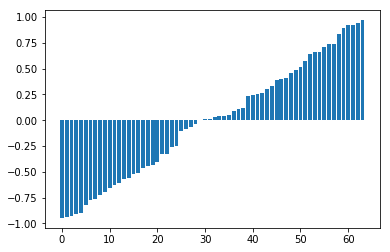

In [83]:
s_sorted = list(result[0])
s_sorted.sort()
plt.bar(range(len(s_sorted)), s_sorted)

# Section 2: <br/> Document Embedding using Gensim utility functions

In [7]:
tagged_documents = [TaggedDocument(words=_d, tags=[str(i)])
               for i, _d in enumerate(documents)]

In [8]:
max_epochs = 100
vec_size = 64
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_documents)

### Attention: The following code takes <span style="color:red">hours</span> to run!

In [9]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_documents,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """
W0728 08:52:02.833388 139631039678272 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [10]:
model.save("doc2vec.model")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [43]:
model.docvecs['1']

array([-0.38695827,  3.8830674 ,  0.43090698,  1.1944395 , -3.8563445 ,
       -0.5207199 ,  3.1082714 , -2.0516856 ,  0.10741506,  5.734262  ,
        1.4895195 , -1.2336769 ,  1.7599123 , -1.0166384 ,  2.1700926 ,
       -1.6097348 ,  0.4833594 ,  1.7696611 , -0.95406926, -1.6711662 ,
       -0.71172476,  2.9915977 ,  2.2542138 , -1.9252723 ,  1.1420487 ,
        0.8682902 , -0.88675433,  1.4410722 , -0.18752459,  6.2745566 ,
        0.5922742 , -2.1087677 , -3.096448  , -0.28587434,  1.1578687 ,
        1.6324515 ,  2.302745  , -0.64902633, -1.1221656 , -0.32792643,
        1.7817233 , -3.081297  ,  3.1640007 ,  0.00929401,  1.3008361 ,
        0.46843928, -0.59939635,  3.8168843 , -3.0407596 , -0.239019  ,
       -0.42742875,  0.6953853 , -0.8329674 , -0.41483083, -1.8112652 ,
        1.6158277 ,  4.574692  , -2.0374384 , -2.1904974 ,  1.0845188 ,
       -0.05043416, -0.05246749,  3.2156043 , -0.37439883], dtype=float32)

### This shows how to get a vector from a unseen document

In [45]:
test_unseen_doc = word_tokenize("This function is deprecated, use smart_open.open instead. See the migration notes for details".lower())
model.infer_vector(test_unseen_doc)

array([-0.00779751,  0.03991877,  0.01181339,  0.04247627, -0.00145237,
       -0.01153552,  0.01932175, -0.01162885, -0.05266205, -0.01168998,
        0.01124748,  0.00862187,  0.07864628, -0.0188379 ,  0.05349749,
       -0.05261891, -0.01583992, -0.0025587 , -0.01101332, -0.02938098,
       -0.00455474, -0.00949716,  0.06491309, -0.00618559,  0.00747635,
        0.01999293, -0.03000754,  0.0433947 ,  0.00303176,  0.01533198,
       -0.01597861,  0.0165515 , -0.02732591, -0.02021959,  0.01120659,
       -0.04488126, -0.0083193 , -0.01599173, -0.02221525,  0.00515372,
        0.03688693,  0.02876372,  0.01095231,  0.07972059,  0.00585544,
        0.01816357, -0.00573944, -0.01267321, -0.0502651 ,  0.01314331,
        0.03976009,  0.00079893, -0.06988663,  0.01264931, -0.02812026,
       -0.02684506,  0.02051595, -0.01882426, -0.00127563,  0.04177581,
       -0.01347028, -0.00188771, -0.01297824,  0.03023175], dtype=float32)